# Libraries and initialisation

In [5]:
from pathlib import Path
import os
import cmcrameri.cm as cmc

COLOR_MAP = cmc.batlow
COLOR_MAP_NAME = 'cmc_batlows'

import dask
dask.config.set(scheduler='threads') 

# Import module
Importing module can take some times since it is linked to multiple other libraries (<30seconds)

In [6]:
from context import CL61_module as mCL61

# Open datasets

In [3]:
# Set some paths to data folder

#ceil_path = str(Path(r'C:\Users\gezas\Documents\CL61\Data'))      ## My portable PC
#ceil_path = str(Path(r'D:\gezas\switchdrive\Private\CL61\Data'))  ## MY FIX PC
#ceil_path = str(Path(r'D:\CL61\Data'))                             # USB Key
server_data_folder = r"Q:\archive\GreenFjord\2023\DATA_RAW\CL61"   # Server path
if not os.path.exists(server_data_folder):
    print("check folder")

check folder


In [ ]:
start_data = '2023-02-05 00:00:00'
end_data = '2023-02-07 00:00:00'
februar06 = mCL61.CL61Processor(folder_path=server_data_folder, start_datetime=start_data, end_datetime=end_data)

In [10]:
march19 = mCL61.CL61Processor(folder_path='../Data_samples', specific_filename='cl61_20230319.nc')

Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.json 


In [11]:
# Or from a specific netcdf file (quicker) 
februar04 = mCL61.CL61Processor(folder_path='../Data_samples', specific_filename='cl61_20230204.nc')

Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.json 


In [ ]:
# Access archives (takes around 2-3 minutes per day of data)
# This takes 15min with mf_opendataset
first_date = "2023-06-28 00:00:00"
last_date = "2023-06-28 23:59:00"
june = mCL61.CL61Processor(folder_path=server_data_folder,
                           start_datetime=first_date,
                           end_datetime=last_date,
                           parallel_computing=True)

# A Priori analysis of features

In [6]:
import seaborn as sns
import matplotlib.pyplot
import numpy as np

c:\Users\gezas\.conda\envs\atm\Lib\site-packages\xarray\core\computation.py:761: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


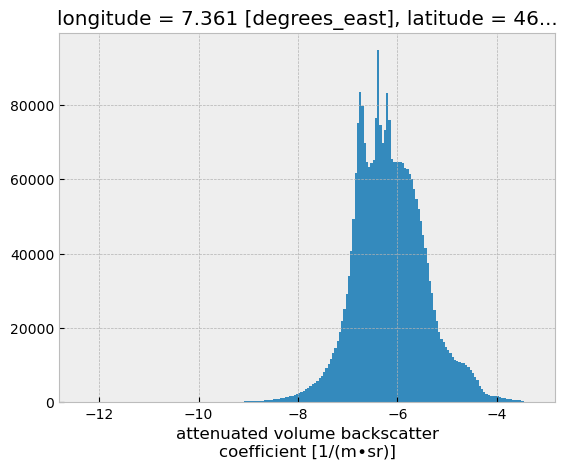

In [25]:
np.log10(februar04.dataset['beta_att']).plot.hist(bins=200)
None

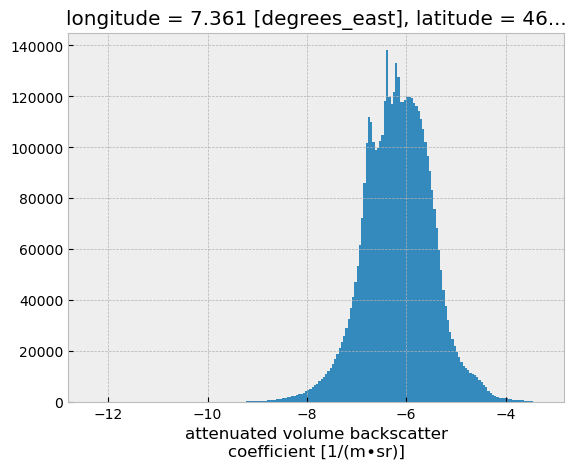

In [26]:
np.log10(np.abs(februar04.dataset['beta_att'])).plot.hist(bins=200)
None

Text(0.5, 1.0, 'Histogram of raw beta attenuation measures - 02.04.2023')

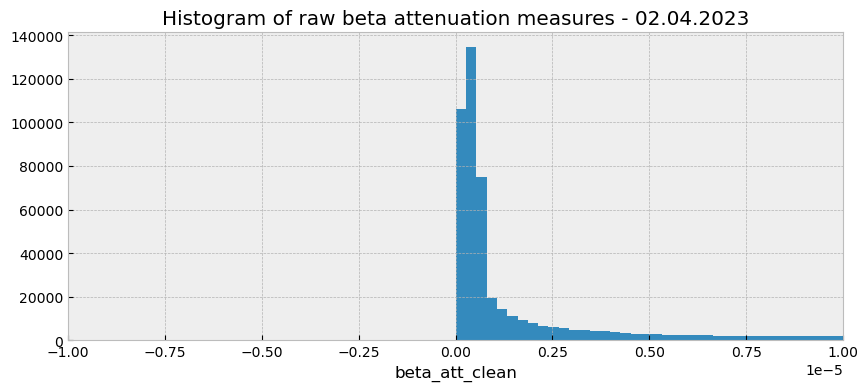

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.subplots(figsize=(10,4))
#np.log10(februar04.dataset['beta_att']).plot.hist(bins=200)
februar04.dataset['beta_att_clean'].plot.hist(bins=2000, xlim = [-1e-5, 1e-5])
plt.title("Histogram of raw beta attenuation measures - 02.04.2023")

## (optional) save to compacted file for improved following usages

In [ ]:
june28.dataset.to_netcdf(r"../Data/cl61_20230628-29.nc")

In [ ]:
februar04.dataset.to_netcdf(r"../Data/cl61_20230204.nc")

# Plot basic colormesh of raw data

c:\Users\gezas\.conda\envs\atm\Lib\site-packages\xarray\core\computation.py:761: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


array([<Axes: xlabel='Time', ylabel='range [m]'>,
       <Axes: xlabel='Time', ylabel='range [m]'>], dtype=object)

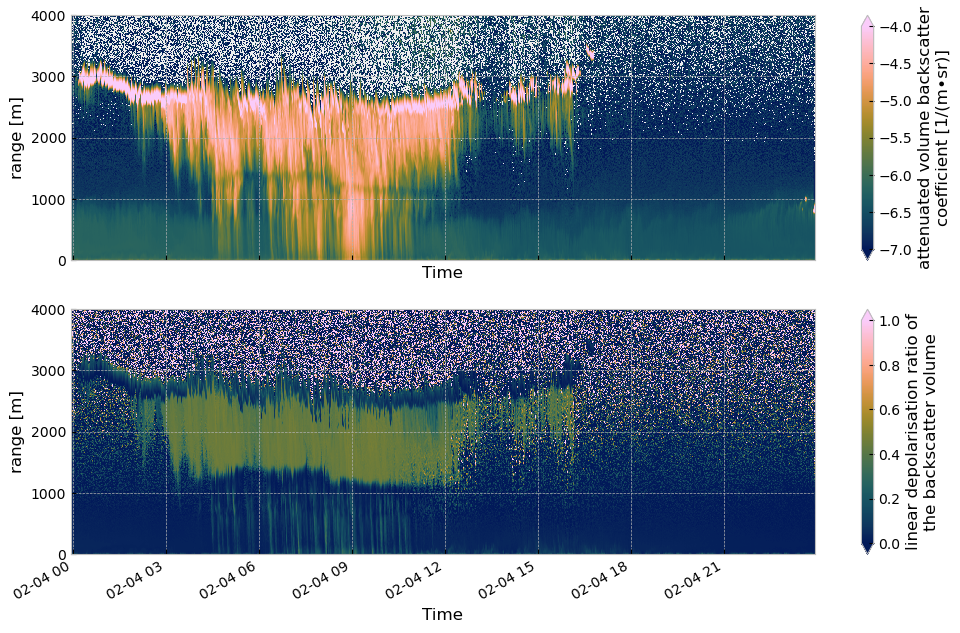

In [5]:
februar04.plot.show_timeserie(range_limits=[0,4000], save_fig=False)

# Filter out noisy part

In [13]:
februar04.process_noise.mask_noise()

The results are stored under new variable: beta_att_clean, linear_depol_ratio_clean, noise mask and to_interpolate_mask


# Visualize filtered features in histogram

(None, None)

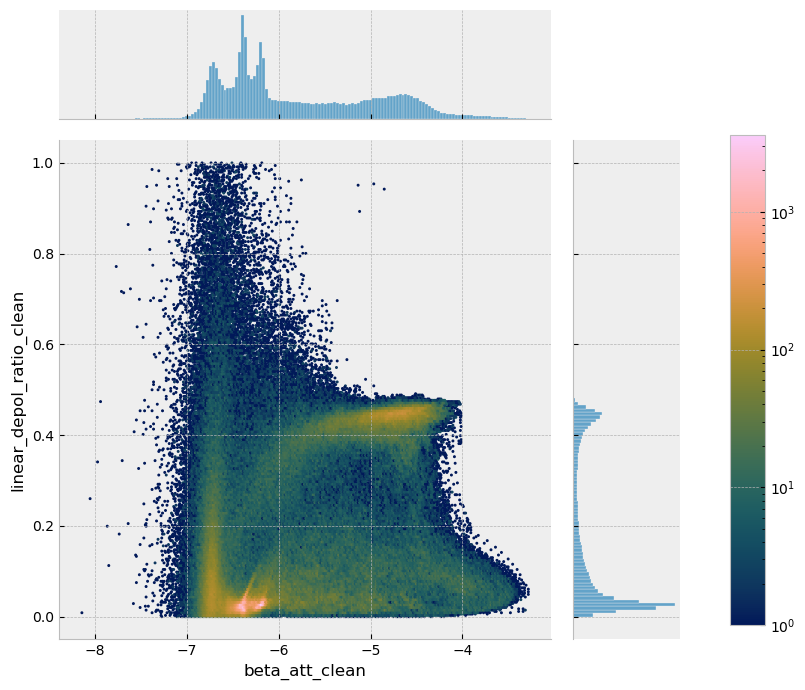

In [8]:
februar04.plot.plot_histogram(variables=['beta_att_clean', 'linear_depol_ratio_clean'])

# Visualize results without noise

array([<Axes: xlabel='Time', ylabel='range [m]'>,
       <Axes: xlabel='Time', ylabel='range [m]'>], dtype=object)

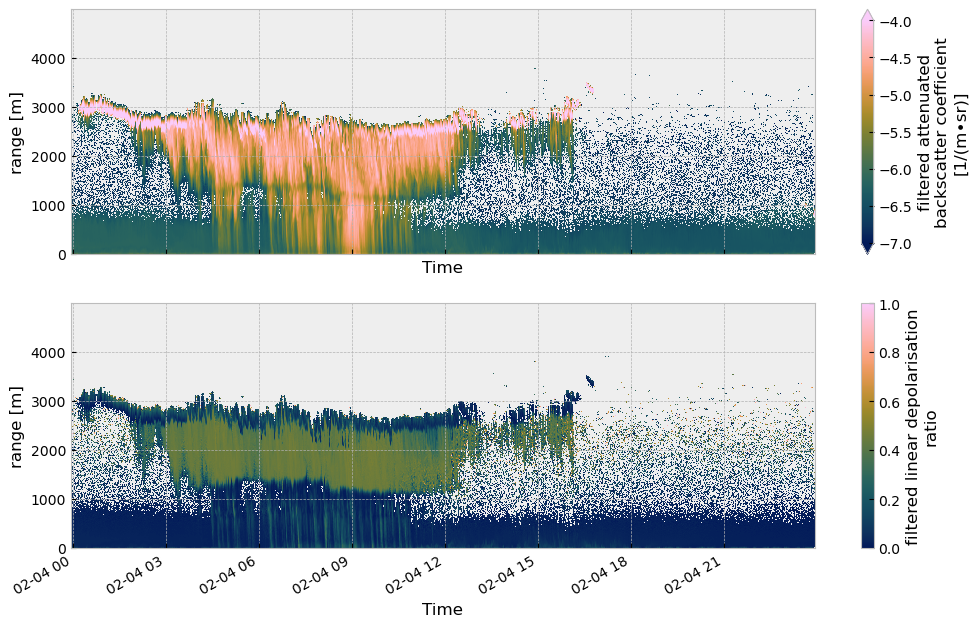

In [8]:
februar04.plot.show_timeserie(variable_names=['beta_att_clean', 'linear_depol_ratio_clean'],
                          range_limits=[0,5000], save_fig=False)

# Visualize as profiles

(<Axes: xlabel='beta att clean', ylabel='range [m]'>,
 <Axes: title={'center': "CL61 profiles - ['2023-02-04 06:00:00', '2023-02-04 09:00:00']"}, xlabel='linear depol ratio clean'>)

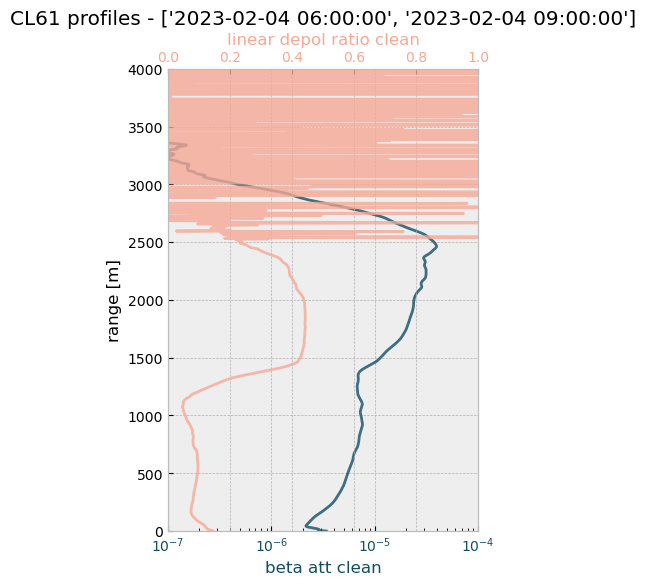

In [6]:
februar04.plot.vertical_profile(time_period=["2023-02-04 06:00:00", "2023-02-04 09:00:00"],
                             var_names=['beta_att', 'linear_depol_ratio'],
                             xlabel1='beta att clean',
                             xlabel2= 'linear depol ratio clean',
                             range_limits=[0, 4000],
                             x_scales=['log', 'lin'])

Saved element to ..\Outputs\2023-02-03_comp_profiles


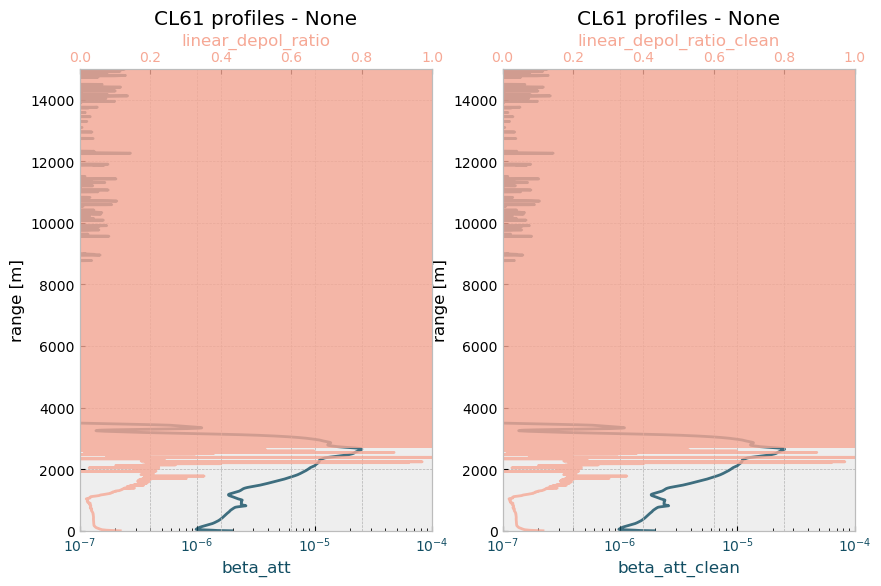

In [8]:
februar04.plot.compare_profiles()

In [9]:
import matplotlib.pyplot as plt

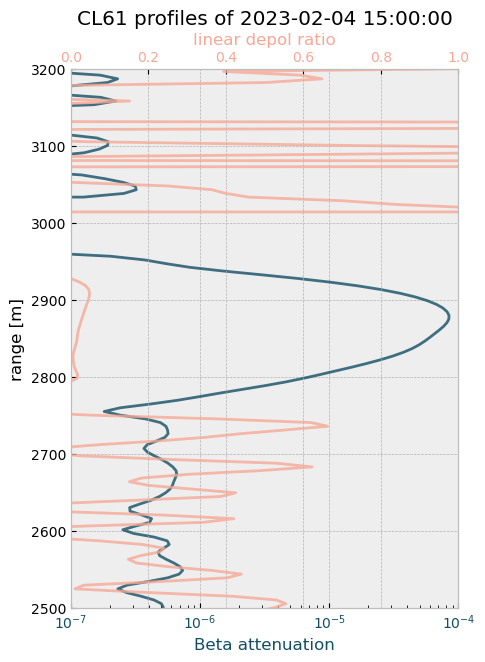

In [11]:
fig, ax = plt.subplots(1,1, figsize = (5,7))
ax = februar04.plot.vertical_profile(time_period="2023-02-04 15:00:00", range_limits=[2500,3200], var_xlims=[[1e-7, 1e-4], [0,1]], ax=ax, fig = fig)
plt.title("CL61 profiles of 2023-02-04 15:00:00")
plt.savefig("feb04_15h_vprofiles_noisy_5km.png", dpi=300)

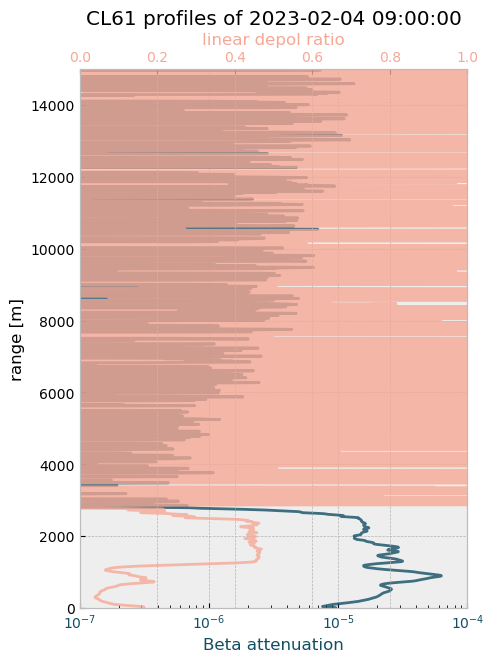

In [14]:
from CL61_module import visualization
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (5,7))
ax = februar04.plot.vertical_profile(time_period="2023-02-04 09:00:00", range_limits=[0,15000], var_xlims=[[1e-7, 1e-4], [0,1]], ax=ax, fig = fig)
plt.title("CL61 profiles of 2023-02-04 09:00:00")
plt.savefig("feb04_9h_vprofiles_noisy_5km.png", dpi=300)

# Classify

## K-mean classificitaiton

(4717440, 3)
Scaler means: [-5.78283455e+00  1.75196911e-01  1.31780207e+03]  
 and scales: [8.24022280e-01 1.74953662e-01 8.67763000e+02]


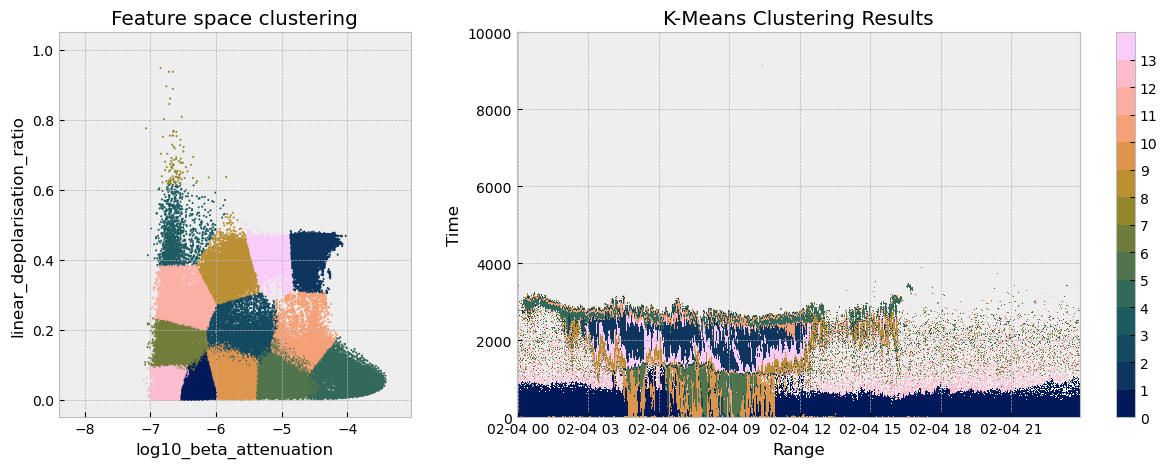

saving results under followingkmean_clusters


In [14]:
februar04.classification.Kmeans_clustering(variable_as_features=['beta_att_clean', 'linear_depol_ratio_clean', 'range'],
                                        weights=[1, 1, 0.25],
                                        cluster_N = 14,
                                        plot_result = True,
                                        save_fig=False)

# Classify

In [15]:
februar04.classification.classify_clusters()

Classifying cluster from kmean_clusters


 Successful cluster classification stored in dataset under classified_clusters


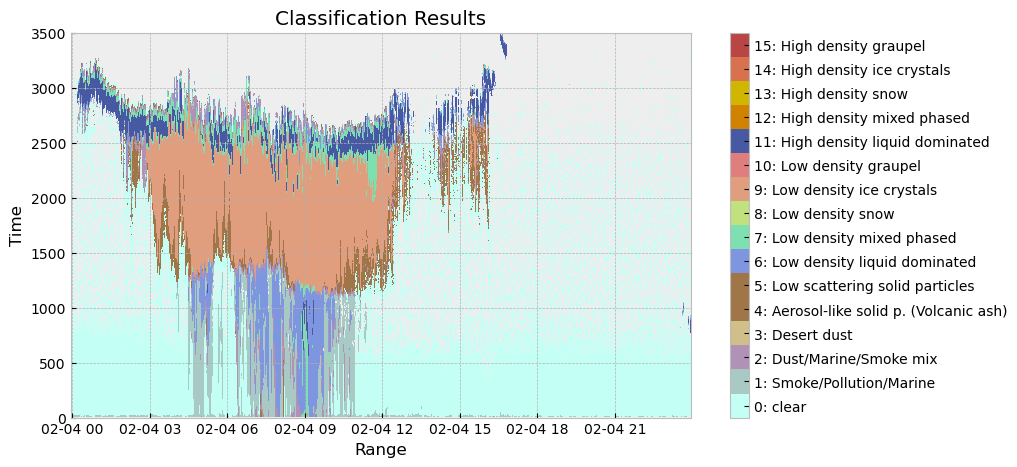

(<Figure size 1000x500 with 2 Axes>,
 <Axes: title={'center': 'Classification Results'}, xlabel='Range', ylabel='Time'>)

In [16]:
februar04.plot.show_classified_timeserie( classified_variable='classified_clusters', ylims=[0,3500])

In [17]:
februar04.classification.classify_elementwise()

Successful pixel-wise classification stored in dataset under classified_elements


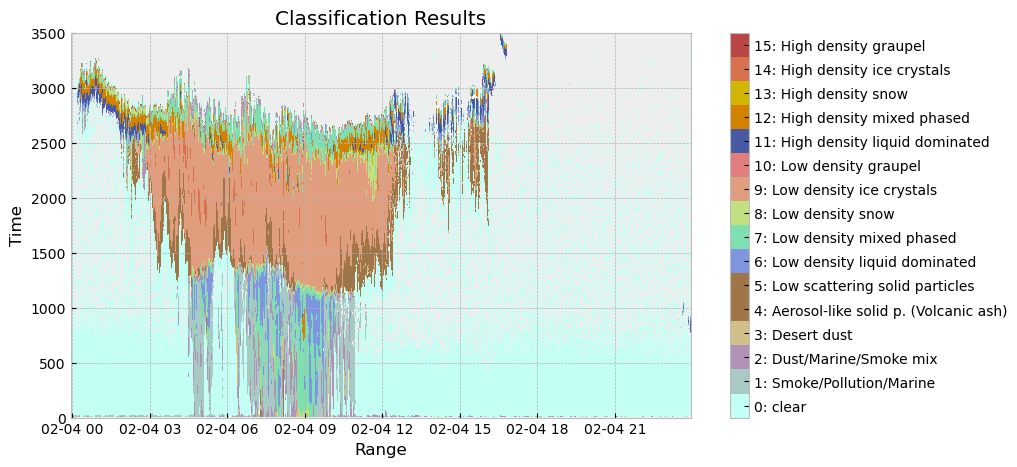

(<Figure size 1000x500 with 2 Axes>,
 <Axes: title={'center': 'Classification Results'}, xlabel='Range', ylabel='Time'>)

In [18]:
februar04.plot.show_classified_timeserie(classified_variable='classified_elements', ylims=[0,3500])

# Same full pipeline for march 19

c:\Users\gezas\.conda\envs\atm\Lib\site-packages\xarray\core\computation.py:761: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


The results are stored under new variable: beta_att_clean, linear_depol_ratio_clean, noise mask and to_interpolate_mask
(2375100, 3)
Scaler means: [-5.68485094e+00  1.04047739e-01  1.93643685e+03]  
 and scales: [5.97449622e-01 1.25861827e-01 1.49038694e+03]


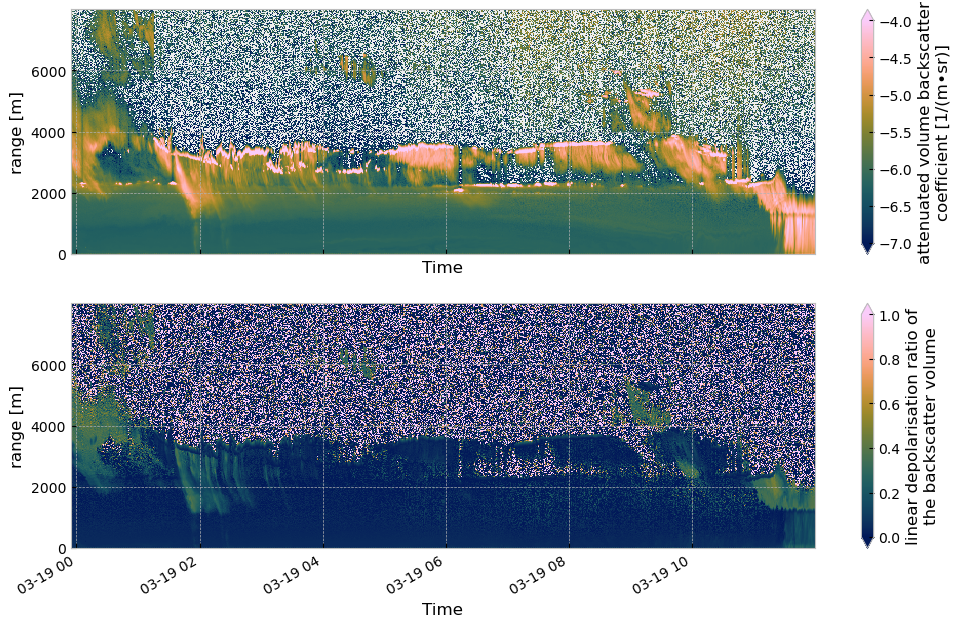

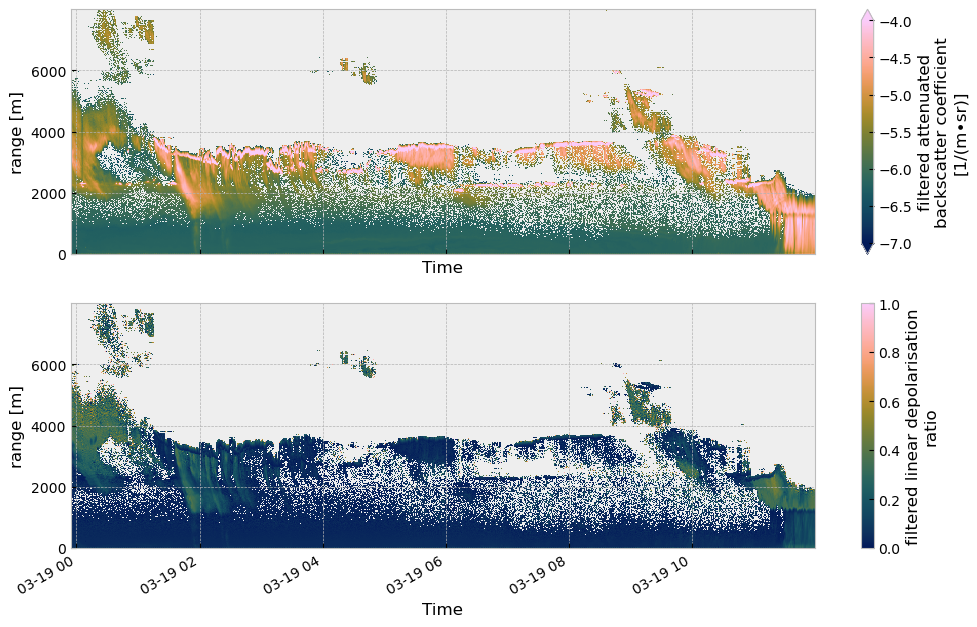

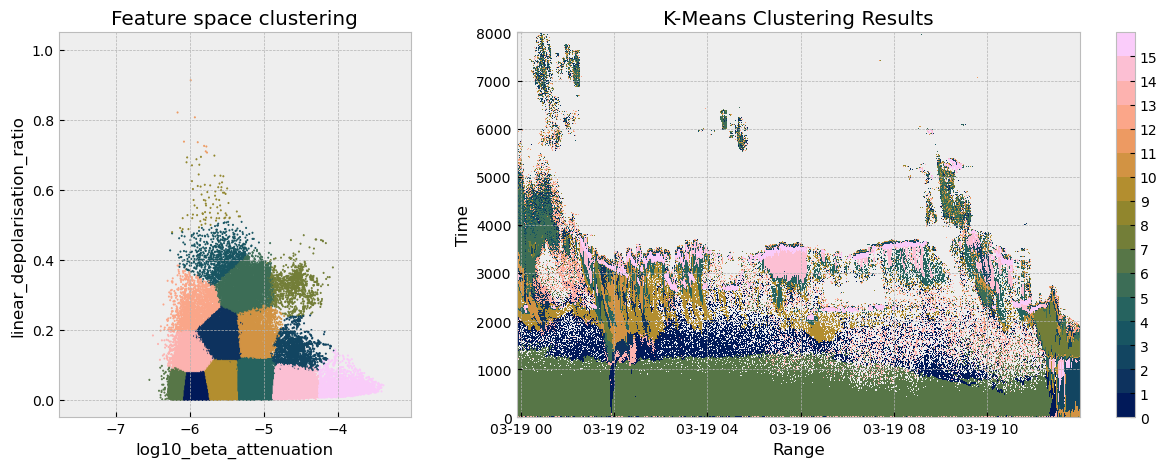

saving results under followingkmean_clusters
Classifying cluster from kmean_clusters
 Successful cluster classification stored in dataset under classified_clusters


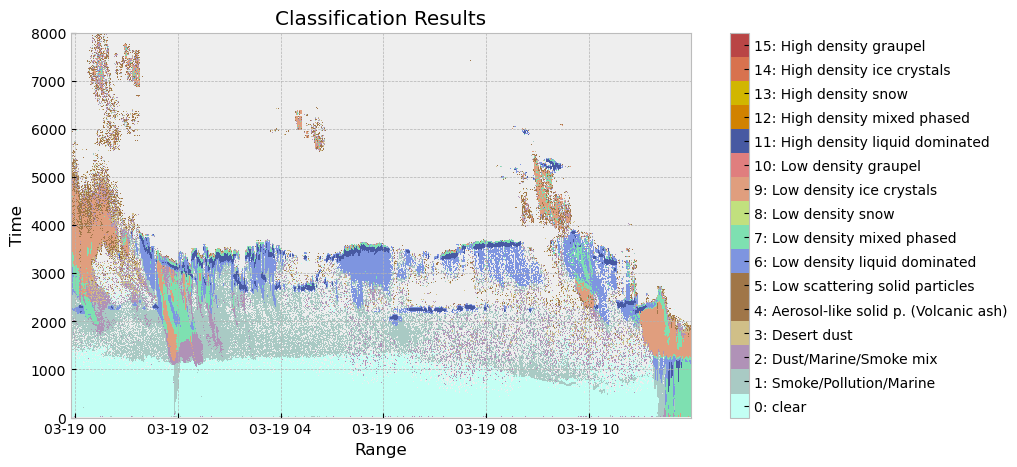

Successful pixel-wise classification stored in dataset under classified_elements


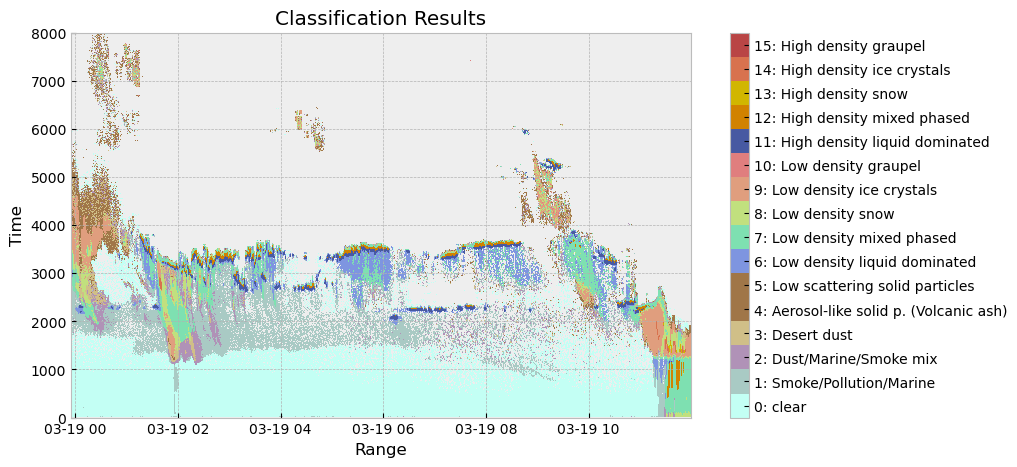

In [12]:
march19.auto_process(range_limits=[0,8000])

(None, None)

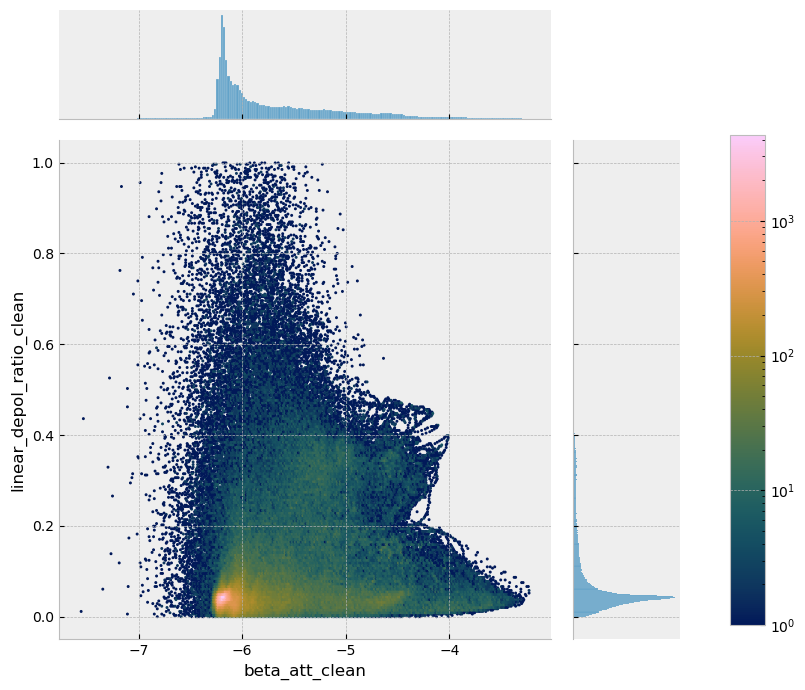

In [6]:
march19.plot.plot_histogram()

# Same full pipeline for july 18

In [7]:
#july18 = mCL61.CL61Processor(folder_path=ceil_path, start_datetime="2023-07-18 00:00:00", end_datetime="2023-07-19 00:00:00")
july18 =  mCL61.CL61Processor(folder_path='../Data_samples', specific_filename='cl61_20230718.nc')

Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.json 


c:\Users\gezas\.conda\envs\atm\Lib\site-packages\xarray\core\computation.py:761: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


The results are stored under new variable: beta_att_clean, linear_depol_ratio_clean, noise mask and to_interpolate_mask
(4717440, 3)
Scaler means: [-5.52556205e+00  9.73955575e-02  1.39403290e+03]  
 and scales: [6.76281825e-01 1.25925978e-01 1.28124972e+03]


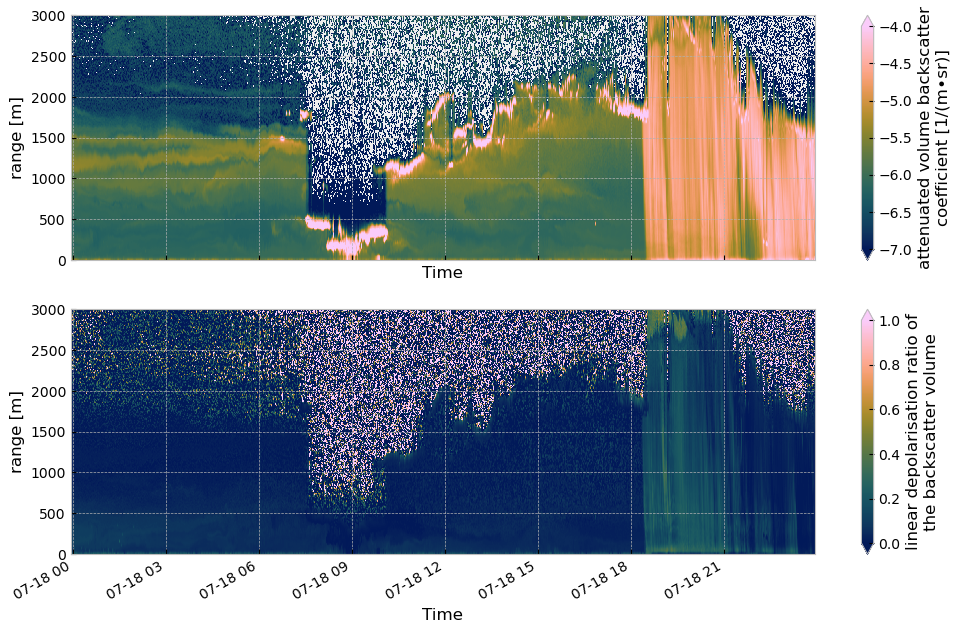

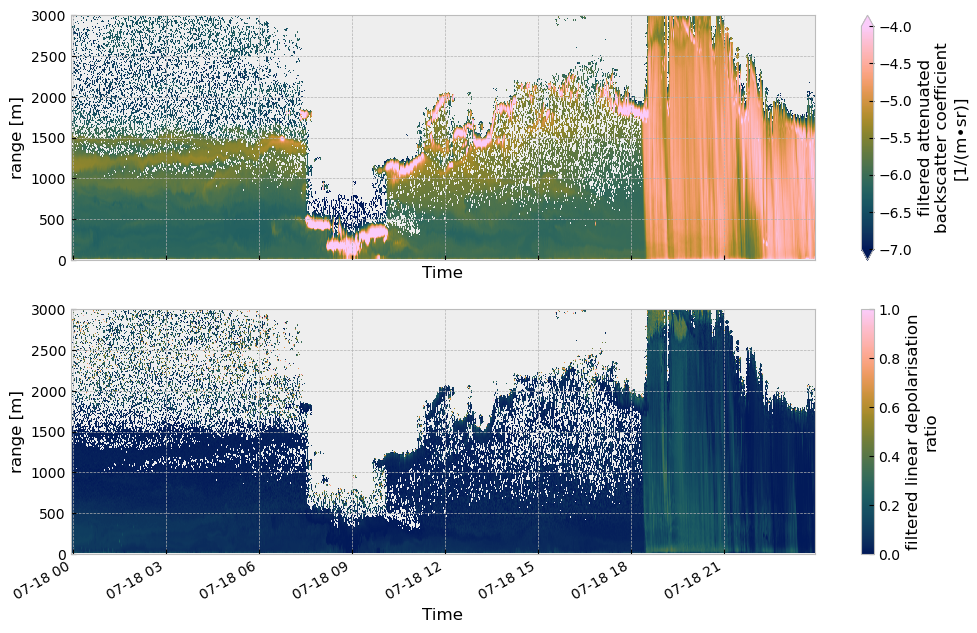

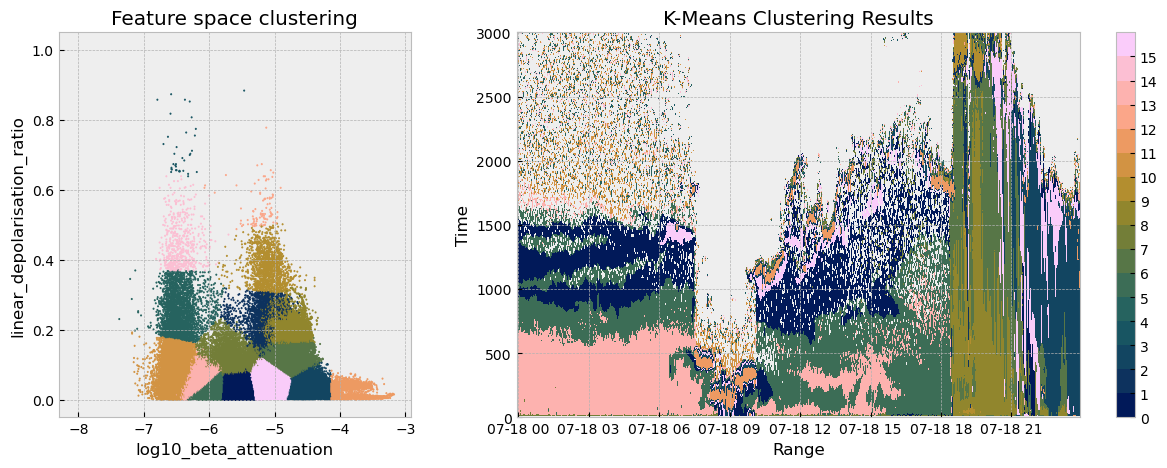

saving results under followingkmean_clusters
Classifying cluster from kmean_clusters
 Successful cluster classification stored in dataset under classified_clusters


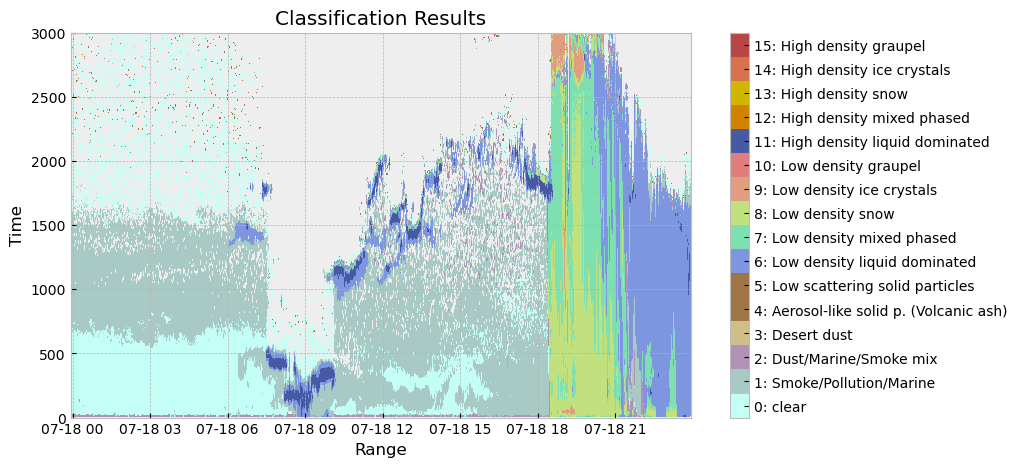

Successful pixel-wise classification stored in dataset under classified_elements


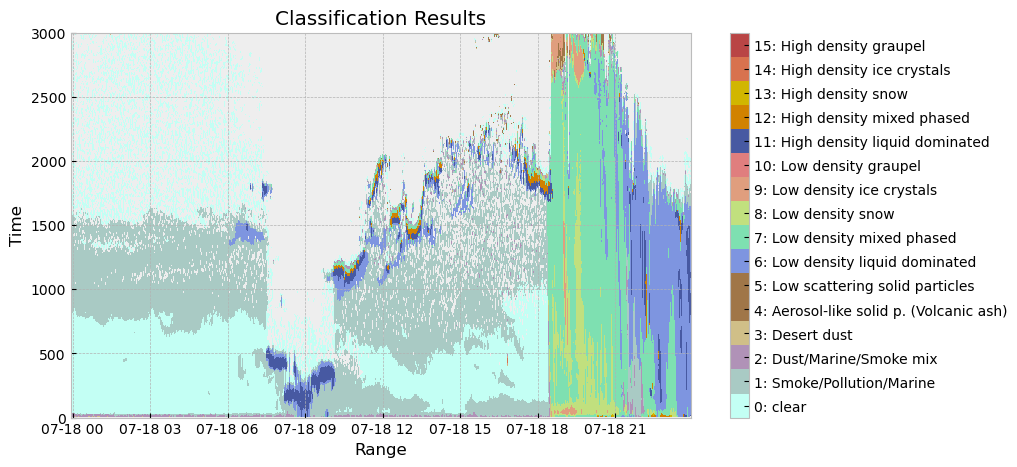

In [8]:
july18.auto_process(range_limits=[0,3000])

(None, None)

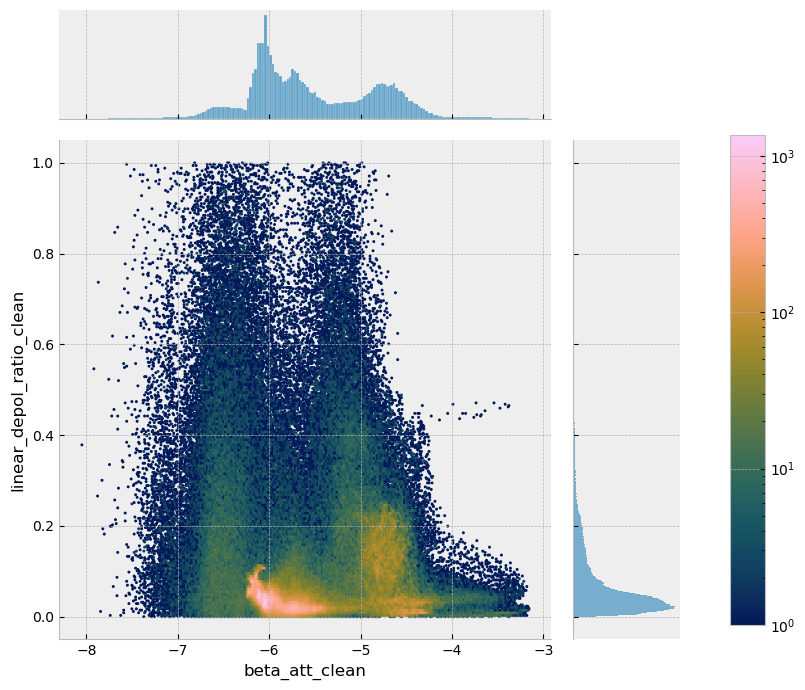

In [20]:
july18.plot.plot_histogram()

IndexError: too many indices

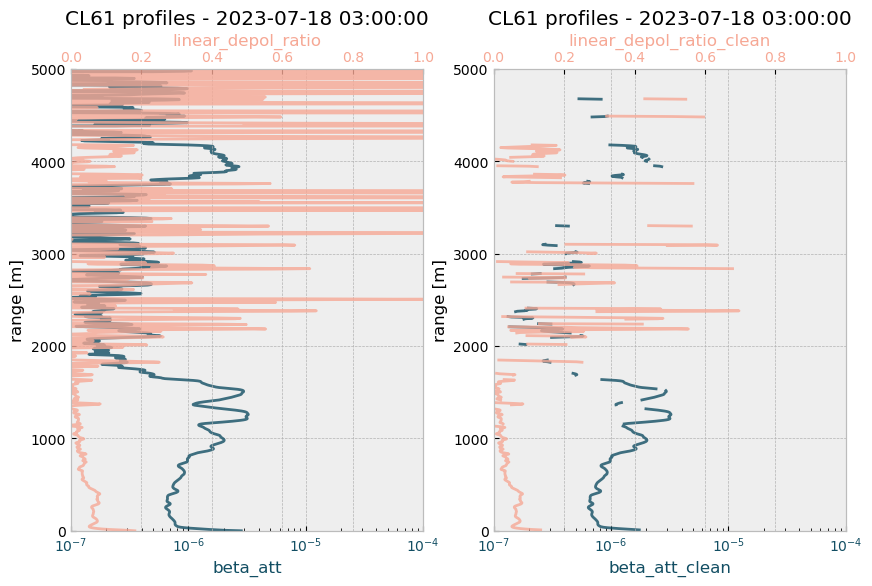

In [19]:
#visualization.plotVerticalProfiles(july18.dataset, time_period="2023-07-18 03:00:00", var_xlims=[[1e-7, 1e-4], [0,1]])
july18.plot.compare_profiles(time_period="2023-07-18 03:00:00", comparison='variable', range_limits=[0,5000])

In [ ]:
july18.dataset.to_netcdf(r"../Data/cl61_20230718.nc")
# took 1m30 from usb to pc